In [420]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# get data

In [421]:
datapath = r"./data/"

In [422]:
data = pd.read_csv(os.path.join(datapath,'RendimentoEscolar2000-2015.csv')) #, encoding='latin-1'

In [423]:
enem = pd.read_csv(os.path.join(datapath,'ENEM2015.csv'))
enem.rename(columns={'Classificacao':'y', 'CODIGO DA ENTIDADE': 'CODMEC'}, inplace=True)

In [424]:
dados_escolares = pd.read_csv(os.path.join(datapath,'DadosEscolares1996-2015.csv'))  #, encoding='latin-1'
dados_escolares.drop(['DEP', 'NOME', 'SETEDU', 'DISTRITO07', 'SUBPREF', 'CORED', 'ZONA'], axis=1, inplace=True)

In [425]:
esc = pd.read_csv(os.path.join(datapath,'ESC2013_RMSP_CEM.csv'))  #, encoding='latin-1'
esc.rename(columns={'CODESC': 'CODMEC'}, inplace=True)

activate this to detect duplicate columns
* for c in list(df_train.columns):
*    if c.endswith('x'):
*        print(c)

keep dados_escolares only for year 2015

In [426]:
dados_escolares = dados_escolares[dados_escolares.ANO == 2015]

### check missing obs between datasets before merge operation

In [427]:
print("size of dados_escolares:",len(dados_escolares))
print("size of rendimentos:",len(data))
print("size of ESC2013:",len(esc))

size of dados_escolares: 7127
size of rendimentos: 14944
size of ESC2013: 10937


In [428]:
len(set(dados_escolares['CODMEC']))

7127

In [429]:
print("missing from rendimentos", len(set(dados_escolares['CODMEC']) - set(data['CODMEC'])))
print("missing from dados_escolares", len(set(data['CODMEC']) - set(dados_escolares['CODMEC'])))

missing from rendimentos 2248
missing from dados_escolares 13


# merge datasets

In [430]:
data = data.merge(dados_escolares, left_on='CODMEC', right_on='CODMEC', how="outer")
data.rename(columns={'MAIS EDUCAÃ‡ÃƒO':'MAIS EDUCACAO', 'SITUAÃ‡ÃƒO': 'SITUACAO'}, inplace=True)

In [431]:
data = data.merge(esc, left_on='CODMEC', right_on='CODMEC', how="outer")

In [432]:
print("missing from data", len(set(enem['CODMEC']) - set(data['CODMEC'])))
print("missing from Y", len(set(data['CODMEC']) - set(enem['CODMEC'])))

missing from data 0
missing from Y 10796


In [433]:
data = data.merge(enem, left_on='CODMEC', right_on='CODMEC', how='inner')

In [434]:
data.head()

,CODMEC,ANO_x,DEP,NOME,SETEDU,DISTRITO07,SUBPREF,CORED,ZONA,EFABAND9ANOS1S,...,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL,NUMERO DE PARTICIPANTES,y
0,35054082,2014.0,MUNICIPAL,"LINNEU PRESTES, PROF.",7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,54.9841,Medio Alto,51,1
1,35054082,2013.0,MUNICIPAL,"LINNEU PRESTES, PROF.",7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,54.9841,Medio Alto,51,1
2,35054082,2012.0,Municipal,EMEFM LINNEU PRESTES PROF,7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,54.9841,Medio Alto,51,1
3,35054082,2011.0,Municipal,EMEFM LINNEU PRESTES PROF,7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,54.9841,Medio Alto,51,1
4,35054082,2010.0,Municipal,LINNEU PRESTES PROF EMEFM,7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,54.9841,Medio Alto,51,1


In [435]:
data.tail()

,CODMEC,ANO_x,DEP,NOME,SETEDU,DISTRITO07,SUBPREF,CORED,ZONA,EFABAND9ANOS1S,...,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL,NUMERO DE PARTICIPANTES,y
1313,35006555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.1287,Medio Alto,77,1
1314,35166406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648.00,533.35,561.61,573.15,549.80,554.48,NaN,NaN,11,2
1315,35006592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,50.6909,Medio Alto,78,1
1316,35038398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,581.09,519.20,521.35,522.83,486.50,512.47,55.4510,Alto,49,2
1317,35006737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,531.92,494.55,514.11,511.57,473.05,498.32,51.9947,Medio Alto,82,2


In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1317
Columns: 471 entries, CODMEC to y
dtypes: float64(440), int64(3), object(28)
memory usage: 4.7+ MB


In [437]:
data['CODMEC'].unique().size

1243

In [438]:
data.columns

Index(['CODMEC', 'ANO_x', 'DEP', 'NOME', 'SETEDU', 'DISTRITO07', 'SUBPREF',
       'CORED', 'ZONA', 'EFABAND9ANOS1S',
       ...
       'RED_EN13', 'LC_EN13', 'MAT_EN13', 'CH_EN13', 'CN_EN13', 'ENEM2013',
       'INSE_AB', 'INSE_CL', 'NUMERO DE PARTICIPANTES', 'y'],
      dtype='object', length=471)

In [439]:
data.describe()

,CODMEC,ANO_x,EFABAND9ANOS1S,EFABAND9ANOS2S,EFABAND9ANOS3S,EFABAND9ANOS4S,EFABAND9ANOS5S,EFABAND9ANOS6S,EFABAND9ANOS7S,EFABAND9ANOS8S,...,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,NUMERO DE PARTICIPANTES,y
count,1.318000e+03,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,413.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1264.000000,1318.000000,1318.000000
mean,3.519349e+07,2013.965517,0.034483,0.017241,0.017241,0.018966,0.020690,0.015517,0.039655,0.036207,...,4.526877,570.779258,534.984346,571.079883,555.581543,511.928350,543.393643,60.094337,60.908194,1.998483
std,2.355464e+05,3.104209,0.217182,0.142925,0.194162,0.222993,0.154113,0.149035,0.367242,0.300373,...,0.574523,59.030479,35.678671,63.486503,45.472491,47.282641,46.753100,5.669078,61.018637,0.674966
min,3.500014e+07,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.300000,380.000000,444.940000,459.380000,461.280000,425.590000,454.690000,46.064600,10.000000,0.000000
25%,3.506083e+07,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.200000,525.520000,507.355000,516.760000,518.330000,472.990000,502.990000,55.338700,22.000000,2.000000
50%,3.512693e+07,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.600000,563.300000,532.195000,564.730000,550.520000,506.245000,539.215000,59.572950,42.000000,2.000000
75%,3.517399e+07,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.900000,609.815000,559.020000,607.410000,584.205000,540.185000,570.110000,63.983950,76.000000,2.000000
max,3.599001e+07,2015.000000,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,6.000000,5.000000,...,6.500000,804.550000,658.290000,836.650000,738.790000,734.030000,741.940000,76.643500,574.000000,4.000000


### remove duplicates

In [440]:
data.sort_values(by=['ANO_x'], ascending=False, inplace=True)
data.drop_duplicates(keep='first',inplace=True) 

# checking types

the dataframe has 3 types of data: int, float and object (string)

In [441]:
for cat in data.columns:
    if data[cat].dtypes != 'int64' and data[cat].dtypes != 'float64' and data[cat].dtypes != 'object':
        print(data[cat].dtypes)

In [442]:
data.dtypes[data.dtypes.map(lambda x: x=='int64')][:10]

CODMEC                     int64
NUMERO DE PARTICIPANTES    int64
y                          int64
dtype: object

In [443]:
data.dtypes[data.dtypes.map(lambda x: x=='float64')][:10]

ANO_x             float64
EFABAND9ANOS1S    float64
EFABAND9ANOS2S    float64
EFABAND9ANOS3S    float64
EFABAND9ANOS4S    float64
EFABAND9ANOS5S    float64
EFABAND9ANOS6S    float64
EFABAND9ANOS7S    float64
EFABAND9ANOS8S    float64
EFABAND9ANOS9S    float64
dtype: object

In [444]:
data.dtypes[data.dtypes.map(lambda x: x=='object')]

DEP               object
NOME              object
SETEDU            object
DISTRITO07        object
SUBPREF           object
CORED             object
ZONA              object
EJATOTAL,,        object
TIPOESC           object
DEPADM            object
MAIS EDUCACAO     object
MERENDA           object
DTURNOS - EMEF    object
T2D3D - EMEF      object
DTURNOS-EMEI      object
T2D3D - EMEI      object
TIPOENSEJA        object
TIPO_EE           object
NOMEESC           object
NOMEMUN           object
NOMDIST           object
TIP_DEP           object
BAIRRO            object
END_ESC           object
NUM_ESC           object
DDD               object
TELEFONE          object
INSE_CL           object
dtype: object

In [445]:
data.dtypes[data.dtypes.map(lambda x: x=='object')]

DEP               object
NOME              object
SETEDU            object
DISTRITO07        object
SUBPREF           object
CORED             object
ZONA              object
EJATOTAL,,        object
TIPOESC           object
DEPADM            object
MAIS EDUCACAO     object
MERENDA           object
DTURNOS - EMEF    object
T2D3D - EMEF      object
DTURNOS-EMEI      object
T2D3D - EMEI      object
TIPOENSEJA        object
TIPO_EE           object
NOMEESC           object
NOMEMUN           object
NOMDIST           object
TIP_DEP           object
BAIRRO            object
END_ESC           object
NUM_ESC           object
DDD               object
TELEFONE          object
INSE_CL           object
dtype: object

# checking categorical data

For columns with string data, evaluate how many categories each columns has

remove columns where one-hot-encoding would not be efficient

In [446]:
for cat in data.columns:
    if data[cat].dtypes == 'object':
        print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, data[cat].unique().size))
        if  data[cat].unique().size >= 10: 
            data.drop(cat, axis=1, inplace=True)
            print("REMOVED: ", cat)

Number of levels in category 'DEP':  4.00 
Number of levels in category 'NOME':  527.00 
REMOVED:  NOME
Number of levels in category 'SETEDU':  13.00 
REMOVED:  SETEDU
Number of levels in category 'DISTRITO07':  87.00 
REMOVED:  DISTRITO07
Number of levels in category 'SUBPREF':  32.00 
REMOVED:  SUBPREF
Number of levels in category 'CORED':  14.00 
REMOVED:  CORED
Number of levels in category 'ZONA':  6.00 
Number of levels in category 'EJATOTAL,,':  9.00 
Number of levels in category 'TIPOESC':  5.00 
Number of levels in category 'DEPADM':  1.00 
Number of levels in category 'MAIS EDUCACAO':  1.00 
Number of levels in category 'MERENDA':  1.00 
Number of levels in category 'DTURNOS - EMEF':  1.00 
Number of levels in category 'T2D3D - EMEF':  2.00 
Number of levels in category 'DTURNOS-EMEI':  1.00 
Number of levels in category 'T2D3D - EMEI':  1.00 
Number of levels in category 'TIPOENSEJA':  2.00 
Number of levels in category 'TIPO_EE':  3.00 
Number of levels in 

### looking for more possible categorical data

In [447]:
count = 0
for cat in data.columns:
    if data[cat].dtypes == 'object': continue
    if data[cat].unique().size > 3: continue
    count += 1
    if count < 10: #if you want to print all columns, remove this condition
        print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, data[cat].unique().size))
        print("    Unique values: \b {}".format(data[cat].unique()))

Number of levels in category 'CONCLUINTES_EF': 2.00 
    Unique values: [ 0. nan]
Number of levels in category 'ANO_y': 2.00 
    Unique values: [2015.   nan]
Number of levels in category 'SITUACAO': 1.00 
    Unique values: [nan]
Number of levels in category 'Qtde_Docentes': 1.00 
    Unique values: [nan]
Number of levels in category 'NUM_FUNC': 1.00 
    Unique values: [nan]
Number of levels in category '6fund': 2.00 
    Unique values: [ 0. nan]
Number of levels in category 'CLEM4S': 3.00 
    Unique values: [ 0.  1. nan]
Number of levels in category 'CLEMMU': 2.00 
    Unique values: [ 0. nan]
Number of levels in category 'ALEMMU': 2.00 
    Unique values: [ 0. nan]


We see that those are not categorical data but simply data with too many missing in general. We will deal with that later.

Now let us remove features with constant values

In [448]:
temp = []
for col in data.columns:
    if data[col].unique().size <= 1: 
        temp.append(col)
        data.drop(col, axis=1, inplace=True)
print("REMOVED variables: \n\n", temp)

REMOVED variables: 

 ['DEPADM', 'SITUACAO', 'MAIS EDUCACAO', 'Qtde_Docentes', 'NUM_FUNC', 'MERENDA', 'DTURNOS - EMEF', 'DTURNOS-EMEI', 'T2D3D - EMEI', 'COD_SC', 'ENS_REG', 'ESP_MED', 'ESP_MED_I', 'ESP_MED_N', 'ESP_MED_P', 'ESP_EJA_F', 'ESP_EJA_M', 'EJA_PROJ']


In [449]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 290 to 1317
Columns: 441 entries, CODMEC to y
dtypes: float64(428), int64(3), object(10)
memory usage: 4.4+ MB


# Dealing with highly correlated variables
We are going to delete variables with a correlation above some threshold with another variable

In [450]:
def clear_correlated_data(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= abs(threshold)) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
    return dataset

In [451]:
threshold = 0.8
data = clear_correlated_data(data, threshold)

### visualize correlations

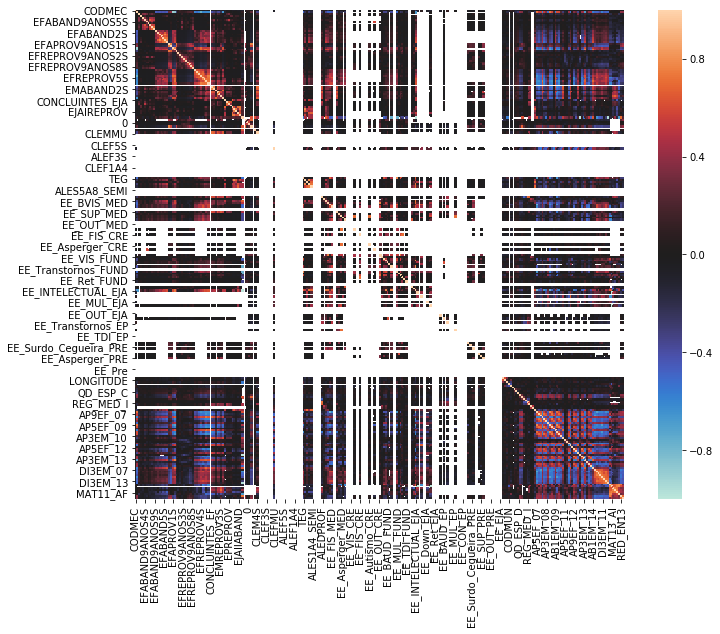

In [452]:
#correlation matrix
corrmatrix = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, square=True, center=0) #cmap=BrBG

we see that more than 100 features were removed

In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 290 to 1317
Columns: 272 entries, CODMEC to y
dtypes: float64(260), int64(2), object(10)
memory usage: 2.7+ MB


# missing data

In [454]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head(20)

,total,percent
MAT13_AI,1270,0.963581
T2D3D - EMEF,1238,0.939302
CODEOL,1237,0.938543
MAT11_AI,1177,0.893020
EE_Surdo_Cegueira_CRE,1134,0.860395
EE_Ret_CRE,1134,0.860395
EE_SUP_CRE,1134,0.860395
EE_Autismo_CRE,1134,0.860395
EE_BAUD_CRE,1134,0.860395
EE_MUL_CRE,1134,0.860395


removing variables if missing data > 80%

In [455]:
data.drop((missing_data[missing_data['percent'] > 0.7]).index,1, inplace=True)

In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 290 to 1317
Columns: 223 entries, CODMEC to y
dtypes: float64(212), int64(2), object(9)
memory usage: 2.3+ MB


# machine learning

In [457]:
import warnings; warnings.simplefilter('ignore')

In [475]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
#from sklearn.metrics import log_loss

### split data

In [484]:
X = data.iloc[:, 4:-1]

In [485]:
X.head()

,EFABAND9ANOS1S,EFABAND9ANOS2S,EFABAND9ANOS3S,EFABAND9ANOS4S,EFABAND9ANOS5S,EFABAND9ANOS6S,EFABAND9ANOS7S,EFABAND9ANOS8S,EFABAND9ANOS9S,EFABAND1S,...,DI3EM_11,DI3EM_12,DI3EM_13,DI3EM_14,MAT07_AF,MAT09_AF,MAT11_AF,LP13_AF,RED_EN13,INSE_CL
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,5.3,1.7,2.3,NaN,NaN,NaN,NaN,617.67,Muito Alto
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.3,8.3,2.8,3.8,NaN,NaN,NaN,NaN,641.93,Muito Alto
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.8,4.2,1.8,6.9,NaN,NaN,NaN,NaN,546.22,Alto
384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,6.5,5.0,NaN,NaN,NaN,NaN,590.77,Alto
385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.8,10.4,9.5,9.2,NaN,NaN,NaN,NaN,564.75,Muito Alto


In [486]:
y = data.iloc[:, -1:]

Removing categorical data. A better option would be to use one-hot-encoding, but I already have too many variables and this type of feature engineering would take some days to work on.

In [487]:
X.drop(['TIPO_EE', 'EJATOTAL,,', 'TIPOESC', ], axis=1, inplace=True) #'DEP', 'ZONA'

In [488]:
X.drop(['TIP_DEP', 'DDD', 'INSE_CL'],  axis=1, inplace=True) #

### split train test

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## pipelines with preprocessing steps and crossvalidation
Preprocessing steps:
* StandardScaler will standardize data
* Imputer will deal with missing data

gridsearchcv works great with pipeline. So we are going to use it to find the best parameters.

## baseline classifier

We will start prediction with SVM as our baseline

In [490]:
from sklearn.svm import SVC

In [491]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('svm', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'svm__C':[1, 10, 100],
              'svm__gamma':[0.1, 0.01]}

# Instantiate the GridSearchCV object: clf_svm
clf_svm = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_svm.fit(X_train, y_train)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_svm.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_svm.best_score_))


TUNED MODEL PARAMETERS:
 {'svm__C': 10, 'svm__gamma': 0.01}

TUNED ACCURACY:
 0.7321041214750542


an alternative for imputation would be to drop rows when missing

In [492]:
data_nomissing = data.dropna()

but in this case we reduce the dataset to just 82 entries. So we won't do that.

In [493]:
data_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 223 entries, CODMEC to y
dtypes: float64(212), int64(2), object(9)
memory usage: 0.0+ bytes


we could drop columns instead of rows, but there would remain too few features. The code for doing this is:
* total = data.isnull().sum().sort_values(ascending=False)
* missing_data = pd.concat([total], axis=1, keys=['total'])
* data_nomissing = data.drop((missing_data[missing_data['total'] > 1]).index,1)

So we are going to test with other ML models, then choose best parameters with crossvalidation, then choose the best model.

# other classifiers

In [494]:
from sklearn.linear_model import LogisticRegression

In [495]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)

#LogisticRegression()

# Specify the hyperparameter space
c_space = np.logspace(-5, 1, 5)
parameters = {'logreg__C': c_space, 
              'logreg__penalty': ['l1', 'l2'],
              'logreg__random_state':[42]}

# Instantiate the GridSearchCV object: cv
clf_logreg = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_logreg.fit(X_train, y_train)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_logreg.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_logreg.best_score_))


TUNED MODEL PARAMETERS:
 {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__random_state': 42}

TUNED ACCURACY:
 0.7559652928416486


In [496]:
from sklearn.ensemble import RandomForestClassifier

In [497]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'rfc__max_features':[1, 2, "auto", "log2", None],
              'rfc__n_estimators':[300],
              'rfc__random_state':[42]}

# Instantiate the GridSearchCV object: clf_rforest
clf_rforest = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_rforest.fit(X_train, y_train)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_rforest.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_rforest.best_score_))


TUNED MODEL PARAMETERS:
 {'rfc__max_features': None, 'rfc__n_estimators': 300, 'rfc__random_state': 42}

TUNED ACCURACY:
 0.7874186550976139


In [498]:
from sklearn.ensemble import AdaBoostClassifier

In [499]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('adaboost', AdaBoostClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'adaboost__n_estimators':[300],
              'adaboost__random_state':[42]}

# Instantiate the GridSearchCV object: clf_adaboost
clf_adaboost = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_adaboost.fit(X_train, y_train)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_adaboost.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_adaboost.best_score_))


TUNED MODEL PARAMETERS:
 {'adaboost__n_estimators': 300, 'adaboost__random_state': 42}

TUNED ACCURACY:
 0.737527114967462


In [500]:
from sklearn.ensemble import GradientBoostingClassifier

In [501]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('gbc', GradientBoostingClassifier())]

pipeline = Pipeline(steps)
 
# Specify the hyperparameter space
parameters = {'gbc__max_features':[1, 2, "auto", "log2", None],
              'gbc__n_estimators':[300],
              'gbc__loss':['deviance'],
              'gbc__random_state':[42]}

# Instantiate the GridSearchCV object: clf_gbc
clf_gbc = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_gbc.fit(X_train, y_train)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_gbc.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_gbc.best_score_))


TUNED MODEL PARAMETERS:
 {'gbc__loss': 'deviance', 'gbc__max_features': 'log2', 'gbc__n_estimators': 300, 'gbc__random_state': 42}

TUNED ACCURACY:
 0.7733188720173536


In [502]:
from sklearn.neighbors import KNeighborsClassifier

In [503]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
 
# Specify the hyperparameter space
parameters = {'knn__n_neighbors':[1, 3, 5, 10, 15, 20, 50],
              'knn__weights':['uniform', 'distance'],
              'knn__algorithm':['auto']}

# Instantiate the GridSearchCV object: clf_knn
clf_knn = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_knn.fit(X_train, y_train)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_knn.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_knn.best_score_))


TUNED MODEL PARAMETERS:
 {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

TUNED ACCURACY:
 0.7472885032537961


# Plot results

In [504]:
dic_results = {}
dic_results['svm']= clf_svm.best_score_
dic_results['logistic regression']= clf_logreg.best_score_
dic_results['random forest']= clf_rforest.best_score_
dic_results['adaboost']= clf_adaboost.best_score_
dic_results['gradient boosting']= clf_gbc.best_score_
dic_results['knn']= clf_knn.best_score_

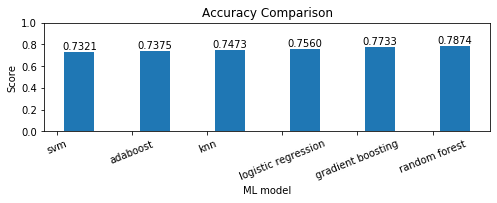

In [505]:
import operator
tup_results = sorted(dic_results.items(), key=operator.itemgetter(1))

N = len(dic_results)
ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
rects = ax.bar(ind+0.5, list(zip(*tup_results))[1], width,)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 
            1.005*height, 
            '{0:.4f}'.format(height), 
            ha='center', 
            va='bottom',)

ax.set_ylabel('Score')
ax.set_xlabel('ML model')
ax.set_ylim(ymin=0.0,ymax = 1)
ax.set_title("Accuracy Comparison")
ax.set_xticks(ind + width/2.)
ax.set_xticklabels(list(zip(*tup_results))[0], rotation=22)

plt.show()

# calculate final accuracy with a test set

So we see that the best validated model is Logistic Regression. We will now test it on the test set. We could also compare with other models with their respective best params.

### get best params of regressor
this was previously obtained during cross validation step

In [506]:
params = {}
for k,v in clf_rforest.best_params_.items():
    k = k[5:]
    params[k] = v
params

{'max_features': None, 'n_estimators': 300, 'random_state': 42}

### do prediction with best classifier

In [507]:
#transform X_train
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
imputation = Imputer(strategy='median', axis=0).fit(X_train_scaled)
X_train_nomissing = imputation.transform(X_train_scaled)

#transform X_test
scale = StandardScaler().fit(X_test)
X_test_scaled = scale.transform(X_test)
imputation = Imputer(strategy='median', axis=0).fit(X_test_scaled)
X_test_nomissing = imputation.transform(X_test_scaled)

#instantiate regressor with best params
clf_logreg_validated = RandomForestClassifier(max_features = params['max_features'], n_estimators = params['n_estimators'], random_state = params['random_state'])

#fit regressor
clf_logreg_validated.fit(X_train_nomissing, y_train)

#do prediction on test set
y_pred = clf_logreg_validated.predict(X_test_nomissing)

### calculate accuracy on test set

In [508]:
accuracy_score(y_test, y_pred)

0.7651515151515151

### classification report

In [509]:
print("\nCLASSIFICATION_REPORT:\n", classification_report(y_test, y_pred))


CLASSIFICATION_REPORT:
               precision    recall  f1-score   support

           1       0.75      0.63      0.68        81
           2       0.80      0.90      0.85       261
           3       0.36      0.23      0.28        35
           4       0.71      0.53      0.61        19

    accuracy                           0.77       396
   macro avg       0.66      0.57      0.60       396
weighted avg       0.75      0.77      0.75       396

